In [1]:
import math
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#CREATING BANDS

def SWCNT(N_x, N_y):
    '''
    creates the dispersion relation (energy bands) of single-walled carbon nanotubes
    based on N_x and N_y
    
    '''
    lambda_0 = 0.129
    lambda_1 = -3.033
    
    nth_bands = []
    #------------------------------------------------------------ARMCHAIR NANOTUBE
    if N_x == N_y:
        
        ka = np.linspace(-np.pi, np.pi, 1000)
        E = np.zeros(shape = (2, len(ka)))
        
        #plt.figure(figsize = (10,4))
        
        for i in range(N_x): ##q is i+1
            E[0] = lambda_0*np.sqrt(1 + (4*np.cos((i+1)*np.pi/N_x)*np.cos(ka/2)) + (4*(np.cos(ka/2)**2)))
            E[1] = -lambda_0*np.sqrt(1 + (4*np.cos((i+1)*np.pi/N_x)*np.cos(ka/2)) + (4*(np.cos(ka/2)**2)))
            
            #print(np.shape(E[0])) checking shape
            #print(np.shape(ka))
    
            #plt.plot(ka, E[0])
            #plt.plot(ka, E[1])
            
            nth_bands.append(np.array([ka, E[0], E[1]]))
    
    #------------------------------------------------------------ZIGZAG NANOTUBE
    if N_x == 0:
        
        ka = np.linspace(-np.pi/np.sqrt(3), np.pi/np.sqrt(3), 1000)
        E = np.zeros(shape = (2, len(ka)))
        
        for i in range(N_y): ##q is i+1
            E[0] = lambda_0*np.sqrt(1 + (4*np.cos(np.sqrt(3)*ka/2)*np.cos((i+1)*np.pi/N_y)) + (4*(np.cos((i+1)*np.pi/N_y)**2)))
            E[1] = -lambda_0*np.sqrt(1 - (4*np.cos(np.sqrt(3)*ka/2)*np.cos((i+1)*np.pi/N_y)) + (4*(np.cos((i+1)*np.pi/N_y)**2)))
            
            nth_bands.append(np.array([ka, E[0], E[1]]))
            
    #------------------------------------------------------------CHIRAL NANOTUBE
    if N_x != N_y:
        if N_x != 0:
        
            ka = np.linspace(-np.pi, np.pi, 1000)
            E = np.zeros(shape = (2, len(ka)))

            for i in range(N_y): ##q is i+1
                E[0] = lambda_0*np.sqrt(1 + (4*np.cos(((i+1)*np.pi/N_x)-((N_y/N_x)*ka/2))*np.cos(ka/2)) + (4*(np.cos(ka/2)**2)))
                E[1] = -lambda_0*np.sqrt(1 + (4*np.cos(((i+1)*np.pi/N_x)-((N_y/N_x)*ka/2))*np.cos(ka/2)) + (4*(np.cos(ka/2)**2)))

                nth_bands.append(np.array([ka, E[0], E[1]]))
            
    nth_bands = np.array(nth_bands)
    
    return nth_bands


In [7]:
#PLOTTING BANDS

def plot_band(band):
    
    '''
    args: a good input would be a result of the SWCNT() function above
          ex) ka, E = SWCNT(9,0)
    '''
    
    for i in band:
        
        plt.plot(i[0],i[1])
        plt.plot(i[0],i[2])


def plot_N_E_bands(num_of_plots, CNT_TYPE = "armchair"):
    '''
    args: num_of_plots must have an integer square root
    
    '''
    

    N = int(np.sqrt(num_of_plots))
    
    
    fig, axs = plt.subplots(N, N, figsize = (13,10))
    
    if CNT_TYPE  == "armchair":
        
        total = 0
        for i in range(N):
            for j in range(N):
                
                total += 1
                band = SWCNT(total,total)
                
                for E in band:
                    
                    axs[i, j].plot(E[0], E[1])
                    axs[i, j].plot(E[0], E[2])
                    axs[i, j].set_title("(n,m) = ("+str(total)+","+str(total)+")", fontsize=18)
                    
        plt.tight_layout()
        #plt.savefig("armchair", dpi=500)
        
            
    if CNT_TYPE == "zigzag":
            
        total = 0
        for i in range(N):
            for j in range(N):
                
                total += 1
                band = SWCNT(0,total)
                
                for E in band:
                    
                    axs[i, j].plot(E[0], E[1])
                    axs[i, j].plot(E[0], E[2])
                    axs[i, j].set_title("(n,m) = ("+str(0)+","+str(total)+")", fontsize=18)
                    
        plt.tight_layout()
        #plt.savefig("zigzag", dpi=500)
    

    if CNT_TYPE == "chiral":
            
        for i in range(N):
            for j in range(N):
                
                if (i+3)>(j+3):
                    band = SWCNT(i+3,j+3)

                    for E in band:

                        axs[i, j].plot(E[0], E[1])
                        axs[i, j].plot(E[0], E[2])
                        axs[i, j].set_title("(n,m) = ("+str(i+3)+","+str(j+3)+")", fontsize=18)
                        
                if (i+3)<=(j+3):
                    band = SWCNT(i+3,j+4)

                    for E in band:

                        axs[i, j].plot(E[0], E[1])
                        axs[i, j].plot(E[0], E[2])
                        axs[i, j].set_title("(n,m) = ("+str(i+3)+","+str(j+4)+")", fontsize=18)
                        
        plt.tight_layout()
        #plt.savefig("chiral", dpi=500)
                    
            
    #plt.tight_layout()

## Looking at the simulated energy bands:
------------------------------------------------------------------
## All armchair tubes act as metals

#### armchair energy bands:
1. don't have a band gap
2. have overlapping energy bands


------------------------------------------------------------------
## One third of non-armchair tubes (zig-zag & other) behave like metals, other 2/3rds behave like semiconductors 
(from page 24 file:///C:/Users/crole/OneDrive/caro%20school/Senior%20FS23/PHY%20491/Introduction_to_Carbon_Nanotubes.pdf)

#### zig-zag energy bands:
1. most have a band gap, but every other N_y = 2,5,8,11... doesn't
2. all have overlapping energy bands

#### chiral energy bands:
2. have overlapping energy bands for N_y = 3,6,9 ...
3. energy bands are asymmetrical for N_x = 3,6,9...

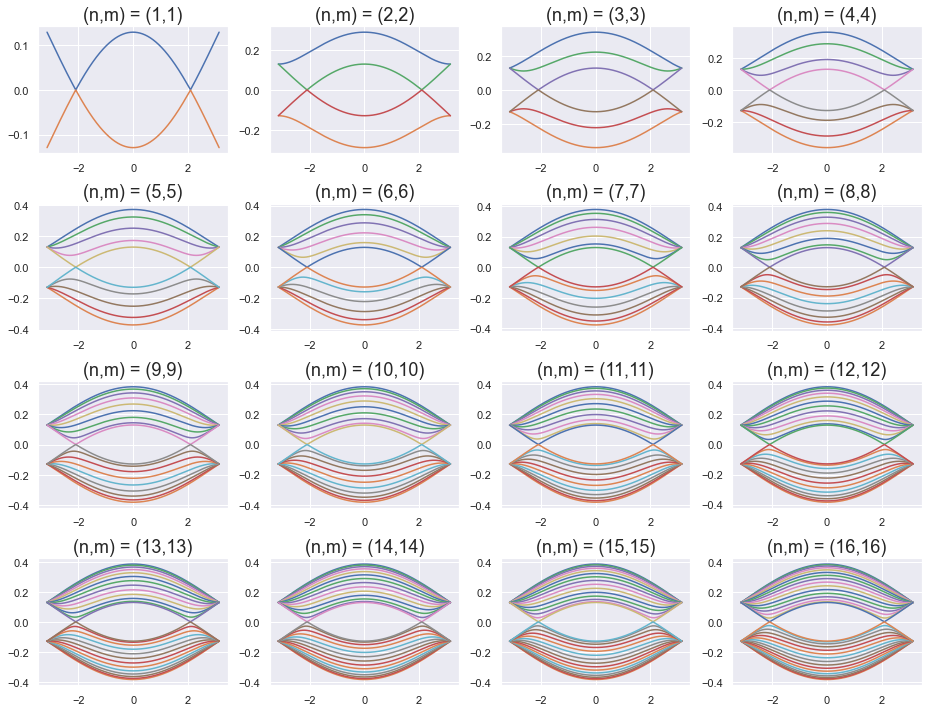

In [8]:
plot_N_E_bands(16, "armchair")

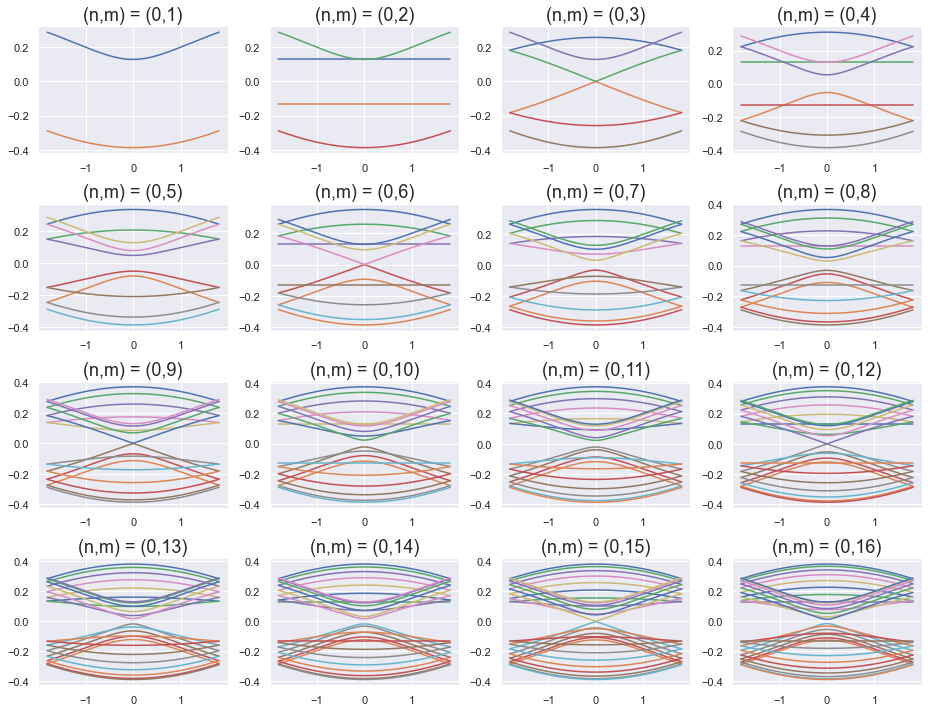

In [9]:
plot_N_E_bands(16, "zigzag")

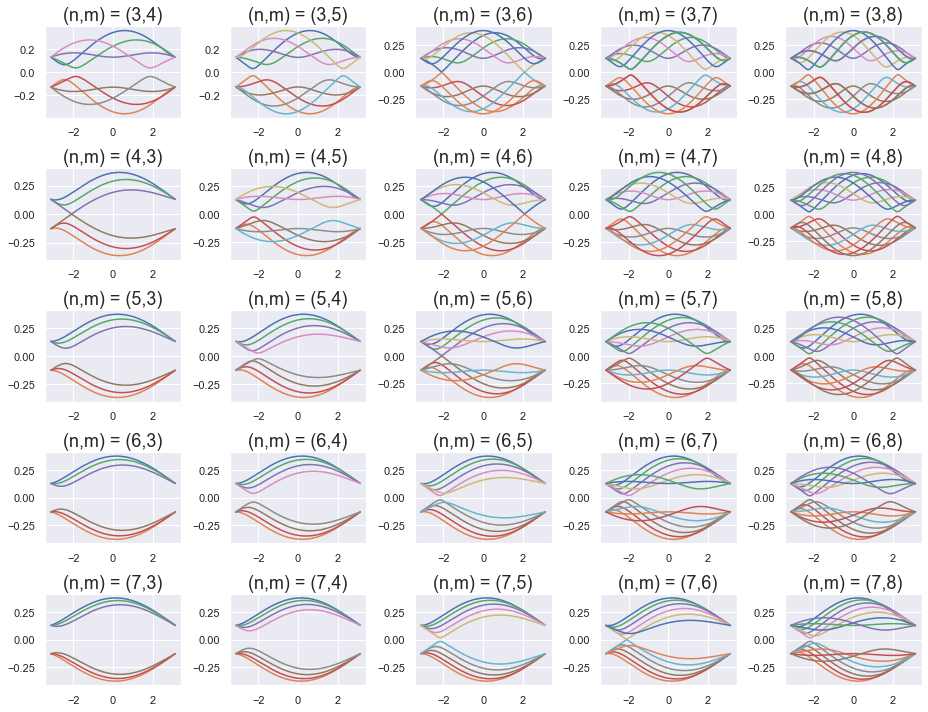

In [11]:
plot_N_E_bands(25, "chiral")